# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

# LA Homelessness Demographic Survey
`economicrt.org-demographic_survey-1` Last Update: 2019-07-04T16:43:48

_Standardized Records from the Demographic Survey of Unsheltered Individuals_


The Los Angeles Homeless Services Authority (LAHSA) conducts annual in-person
surveys of the unsheltered homeless population in Los Angeles. This data
package includes the standardized versions of the annual survey data for 2011
through 2017, combined into a single file (``combined_survey``) and another
multi year file that was produced by UCLA, which includes only the common
columns from the multi-year files. (``multiyear_survey``)

The ``combined_survey`` includes all of the columns from all of the years,
although many columns only exist for one year. The result is that many of
variables are null for one or more of the survey years.

The source for the ``multiyear_survey`` file was produced by UCLA and includes
only a subset of the columns available in ``combined_survey``, but the
variables have many more non-null values.

The best way to compare these files is to look at the EDA notebooks for the
files, and in particular, the Null map at the end of the notebook.

## Processing

Both files have some additional processing

- 'NA' values are converted to blank cells
- A new ``sex`` column which codes the genders Male as 'M', Female as 'F', and all others as 'U'
- A new ``raceeth`` variable for census race and ethnicity categories with values for ``black``, ``white``, ``asian``, ``aian``, ``aian``, ``nhopi``, ``hisp`` and ``other``, based on keywords in the ``Race_Full`` variable. 
- Strip trailing spaces from `Race_Full`
- A new ``geoid`` variable that holds the census tract variable converted to a format Census geoid. 
- A new ``year`` variable that holds an integer version of the `Survey_Year`` variable
## Documentation Links

* [2011 Codebook](https://economicrt.org/wp-content/uploads/2018/08/2011_Unsheltered_Codebook.docx) 2011 Codebook for Standardized Records from the Demographic Survey of Unsheltered Individuals
* [2011 Methodology White Paper](https://economicrt.org/wp-content/uploads/2018/08/2011_Methodology.pdf) 
* [2013 Codebook](https://economicrt.org/wp-content/uploads/2018/08/2013_Unsheltered_Codebook.docx) 2013 Codebook for Standardized Records from the Demographic Survey of Unsheltered Individuals
* [2013 Methodology White Paper](https://economicrt.org/wp-content/uploads/2018/08/2013_Methodology.pdf) 
* [2015 Codebook](https://economicrt.org/wp-content/uploads/2018/08/2015_Unsheltered_Codebook.docx) 2015 Codebook for Standardized Records from the Demographic Survey of Unsheltered Individuals
* [2015 Methodology White Paper](https://economicrt.org/wp-content/uploads/2018/08/2015_Methodology.pdf) 
* [2016 Codebook](https://economicrt.org/wp-content/uploads/2018/08/2016-Unsheltered-Codebook.docx) 2016 Codebook for Standardized Records from the Demographic Survey of Unsheltered Individuals
* [2016 Methodology White Paper](https://economicrt.org/wp-content/uploads/2018/08/2016_Methodology.pdf) 
* [2017 Codebook](https://economicrt.org/wp-content/uploads/2018/08/2017_Sheltered_Codebook.docx) 2017 Codebook for Standardized HMIS Records of Sheltered Individuals
* [2017 Methodology White Paper](https://economicrt.org/wp-content/uploads/2018/08/2017_Methodology.pdf) 
* [Codebook](https://economicrt.org/wp-content/uploads/2018/08/Multi_Year_Codebook_2011_2017.docx) Codebook for Multi-Year Data Set
* [Download Page](https://economicrt.org/publication/los-angeles-county-homeless-count-data-library/) 

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)
* **Publisher** [The Economic Roundtable](https://economicrt.org/about/)
* **Creator** [Los Angeles Homeless Services Authority](https://www.lahsa.org/)

## Resources

* ** [combined_survey](data/combined_survey.csv)**. Combined survey data from 2011 to 2017, with all columns, naievely combined
* ** [multiyear_survey](d

In [3]:
resource_name='combined_survey'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
year,integer,
gender,string,
sex,string,
raceeth,string,
race_full,string,
race_recode,string,
ethnicity,string,
age,integer,
birth_year,integer,
census_tract,string,


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,year,gender,sex,raceeth,race_full,race_recode,ethnicity,age,birth_year,census_tract,...,van_past_6mnths,van_past_year,veteran,work_barrier_experience,work_barrier_gaps,work_barrier_lack_ed,work_barrier_no_access,work_barrier_no_interview,work_barrier_turned_down,weights
0,2011,Female,F,nhwhite,White,European American,European American,18.0,1993.0,NaN,...,NaN,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2011,Female,F,black,Black-African-American,African American,African American,46.0,1964.0,NaN,...,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2011,Male,M,nhwhite,White,European American,European American,55.0,1956.0,NaN,...,NaN,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2011,Male,M,nhwhite,White,European American,European American,50.0,1960.0,NaN,...,NaN,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2011,Male,M,hisp,BLANK,Unknown,Latino,31.0,1979.0,NaN,...,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,1
datetime,0
number,143
other,22


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

,0,3592
currently_pay_shelter,0.0,NaN


# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21168 entries, 0 to 21167
Columns: 143 entries, year to weights
dtypes: float64(138), int64(5)
memory usage: 23.1 MB


None

,count,mean,std,min,25%,50%,75%,max
year,21168.0,2014.537840,1.909064,2011.000000,2013.0,2016.0,2016.000000,2016.000
age,20187.0,44.691683,19.619386,0.000000,34.0,47.0,55.000000,2015.000
birth_year,20118.0,1970.130182,14.263281,1900.000000,1959.0,1968.0,1981.000000,2017.000
spa,21156.0,4.611505,1.852642,1.000000,4.0,4.0,6.000000,8.000
adult_probation_involvement,13034.0,0.306122,0.514694,0.000000,0.0,0.0,1.000000,2.000
adult_with_child,20705.0,0.536634,0.867097,0.000000,0.0,0.0,2.000000,2.000
age_first_homeless,4030.0,27.707196,12.421993,0.000000,18.0,25.0,35.000000,79.000
alcohol_abuse_ever,13845.0,0.223908,0.446008,0.000000,0.0,0.0,0.000000,2.000
alcohol_abuse_past_year,6860.0,0.181924,0.385810,0.000000,0.0,0.0,0.000000,1.000
automobile_past_6mnths,5807.0,0.274152,0.466507,0.000000,0.0,0.0,1.000000,2.000


## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


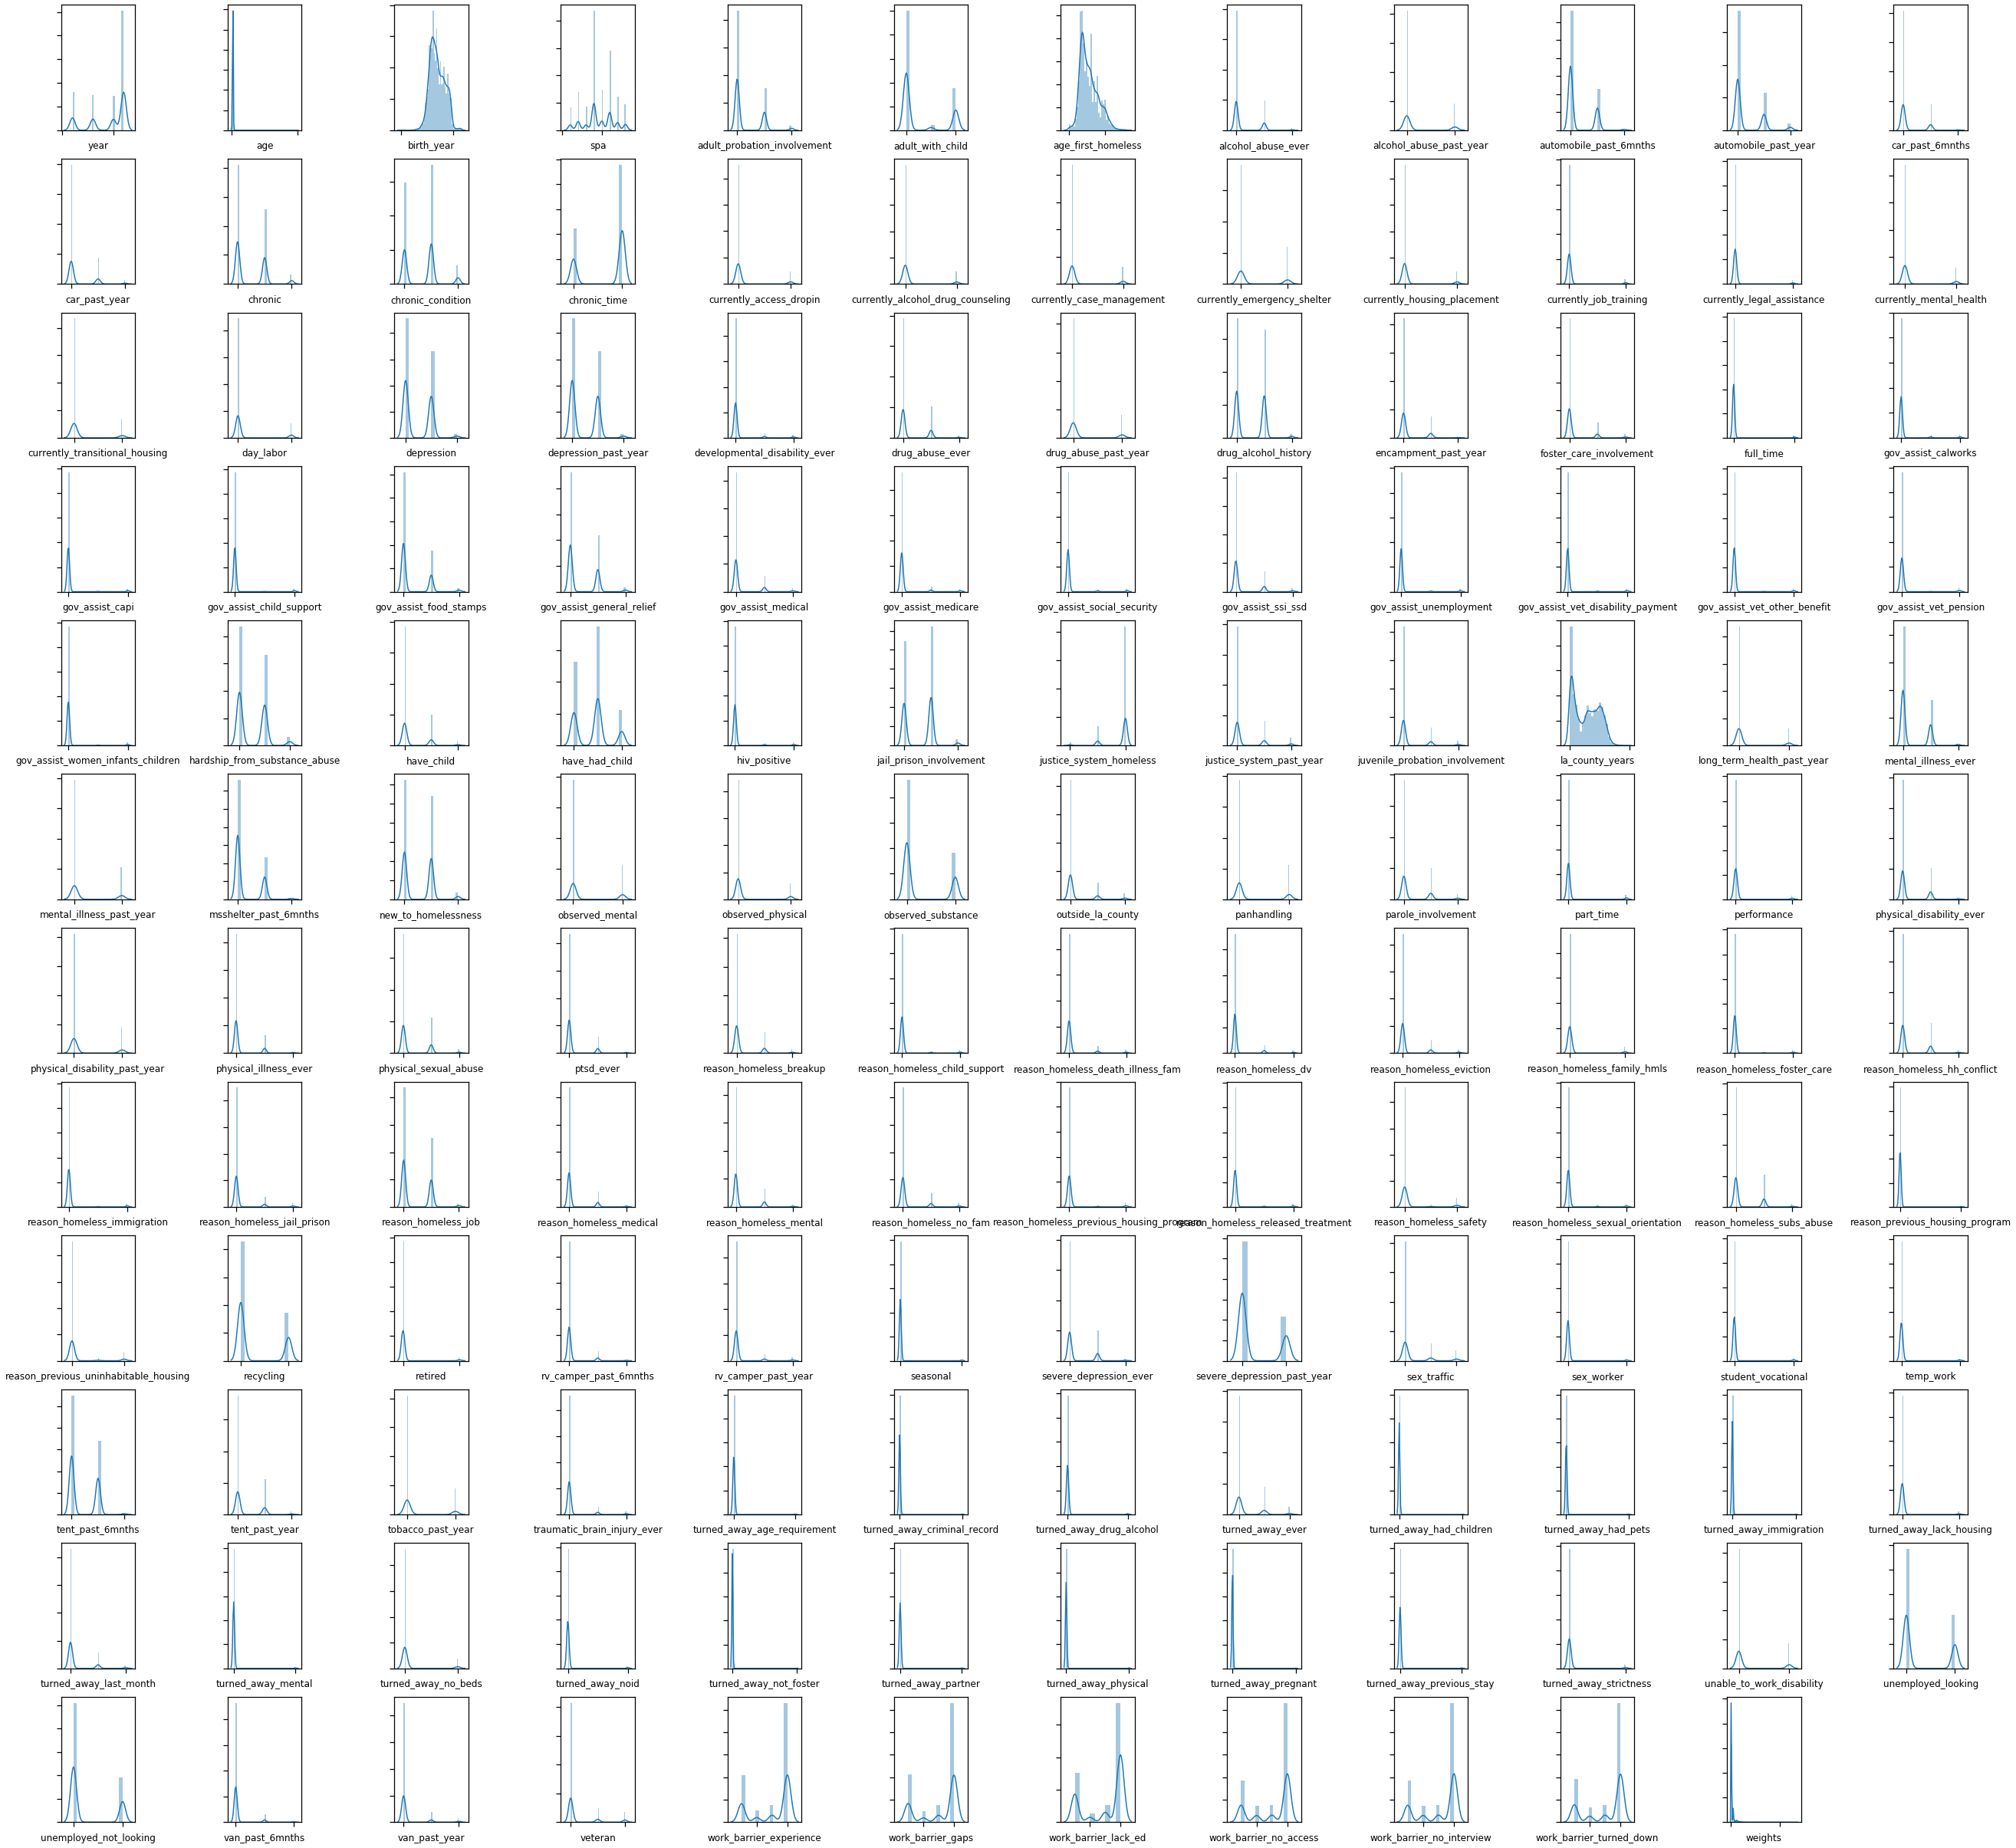

In [14]:
plot_histograms(df[number_col_names])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

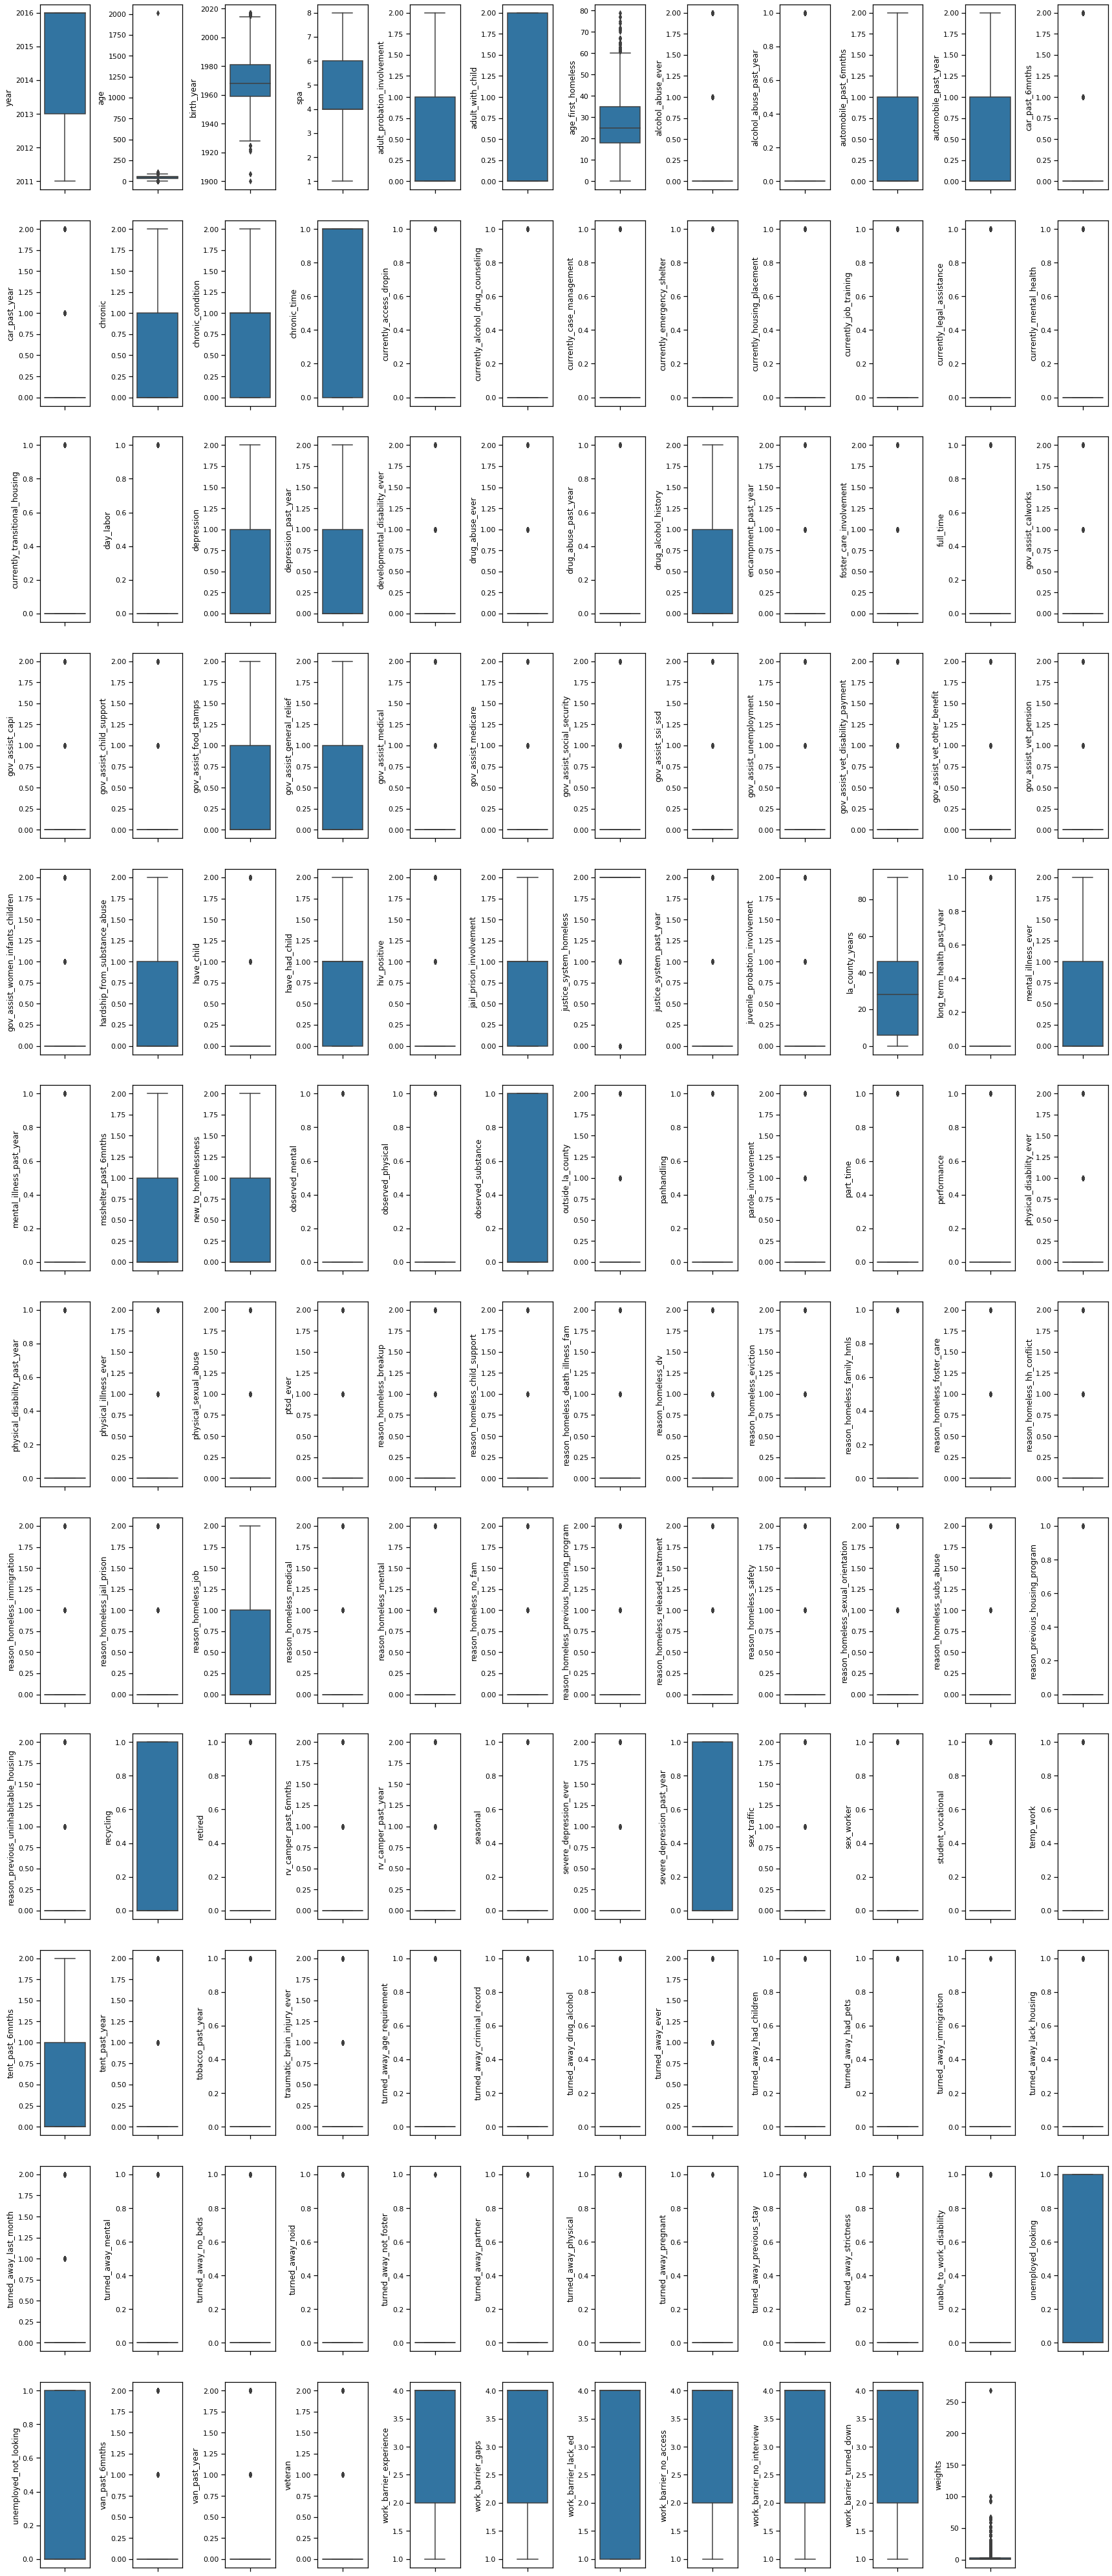

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

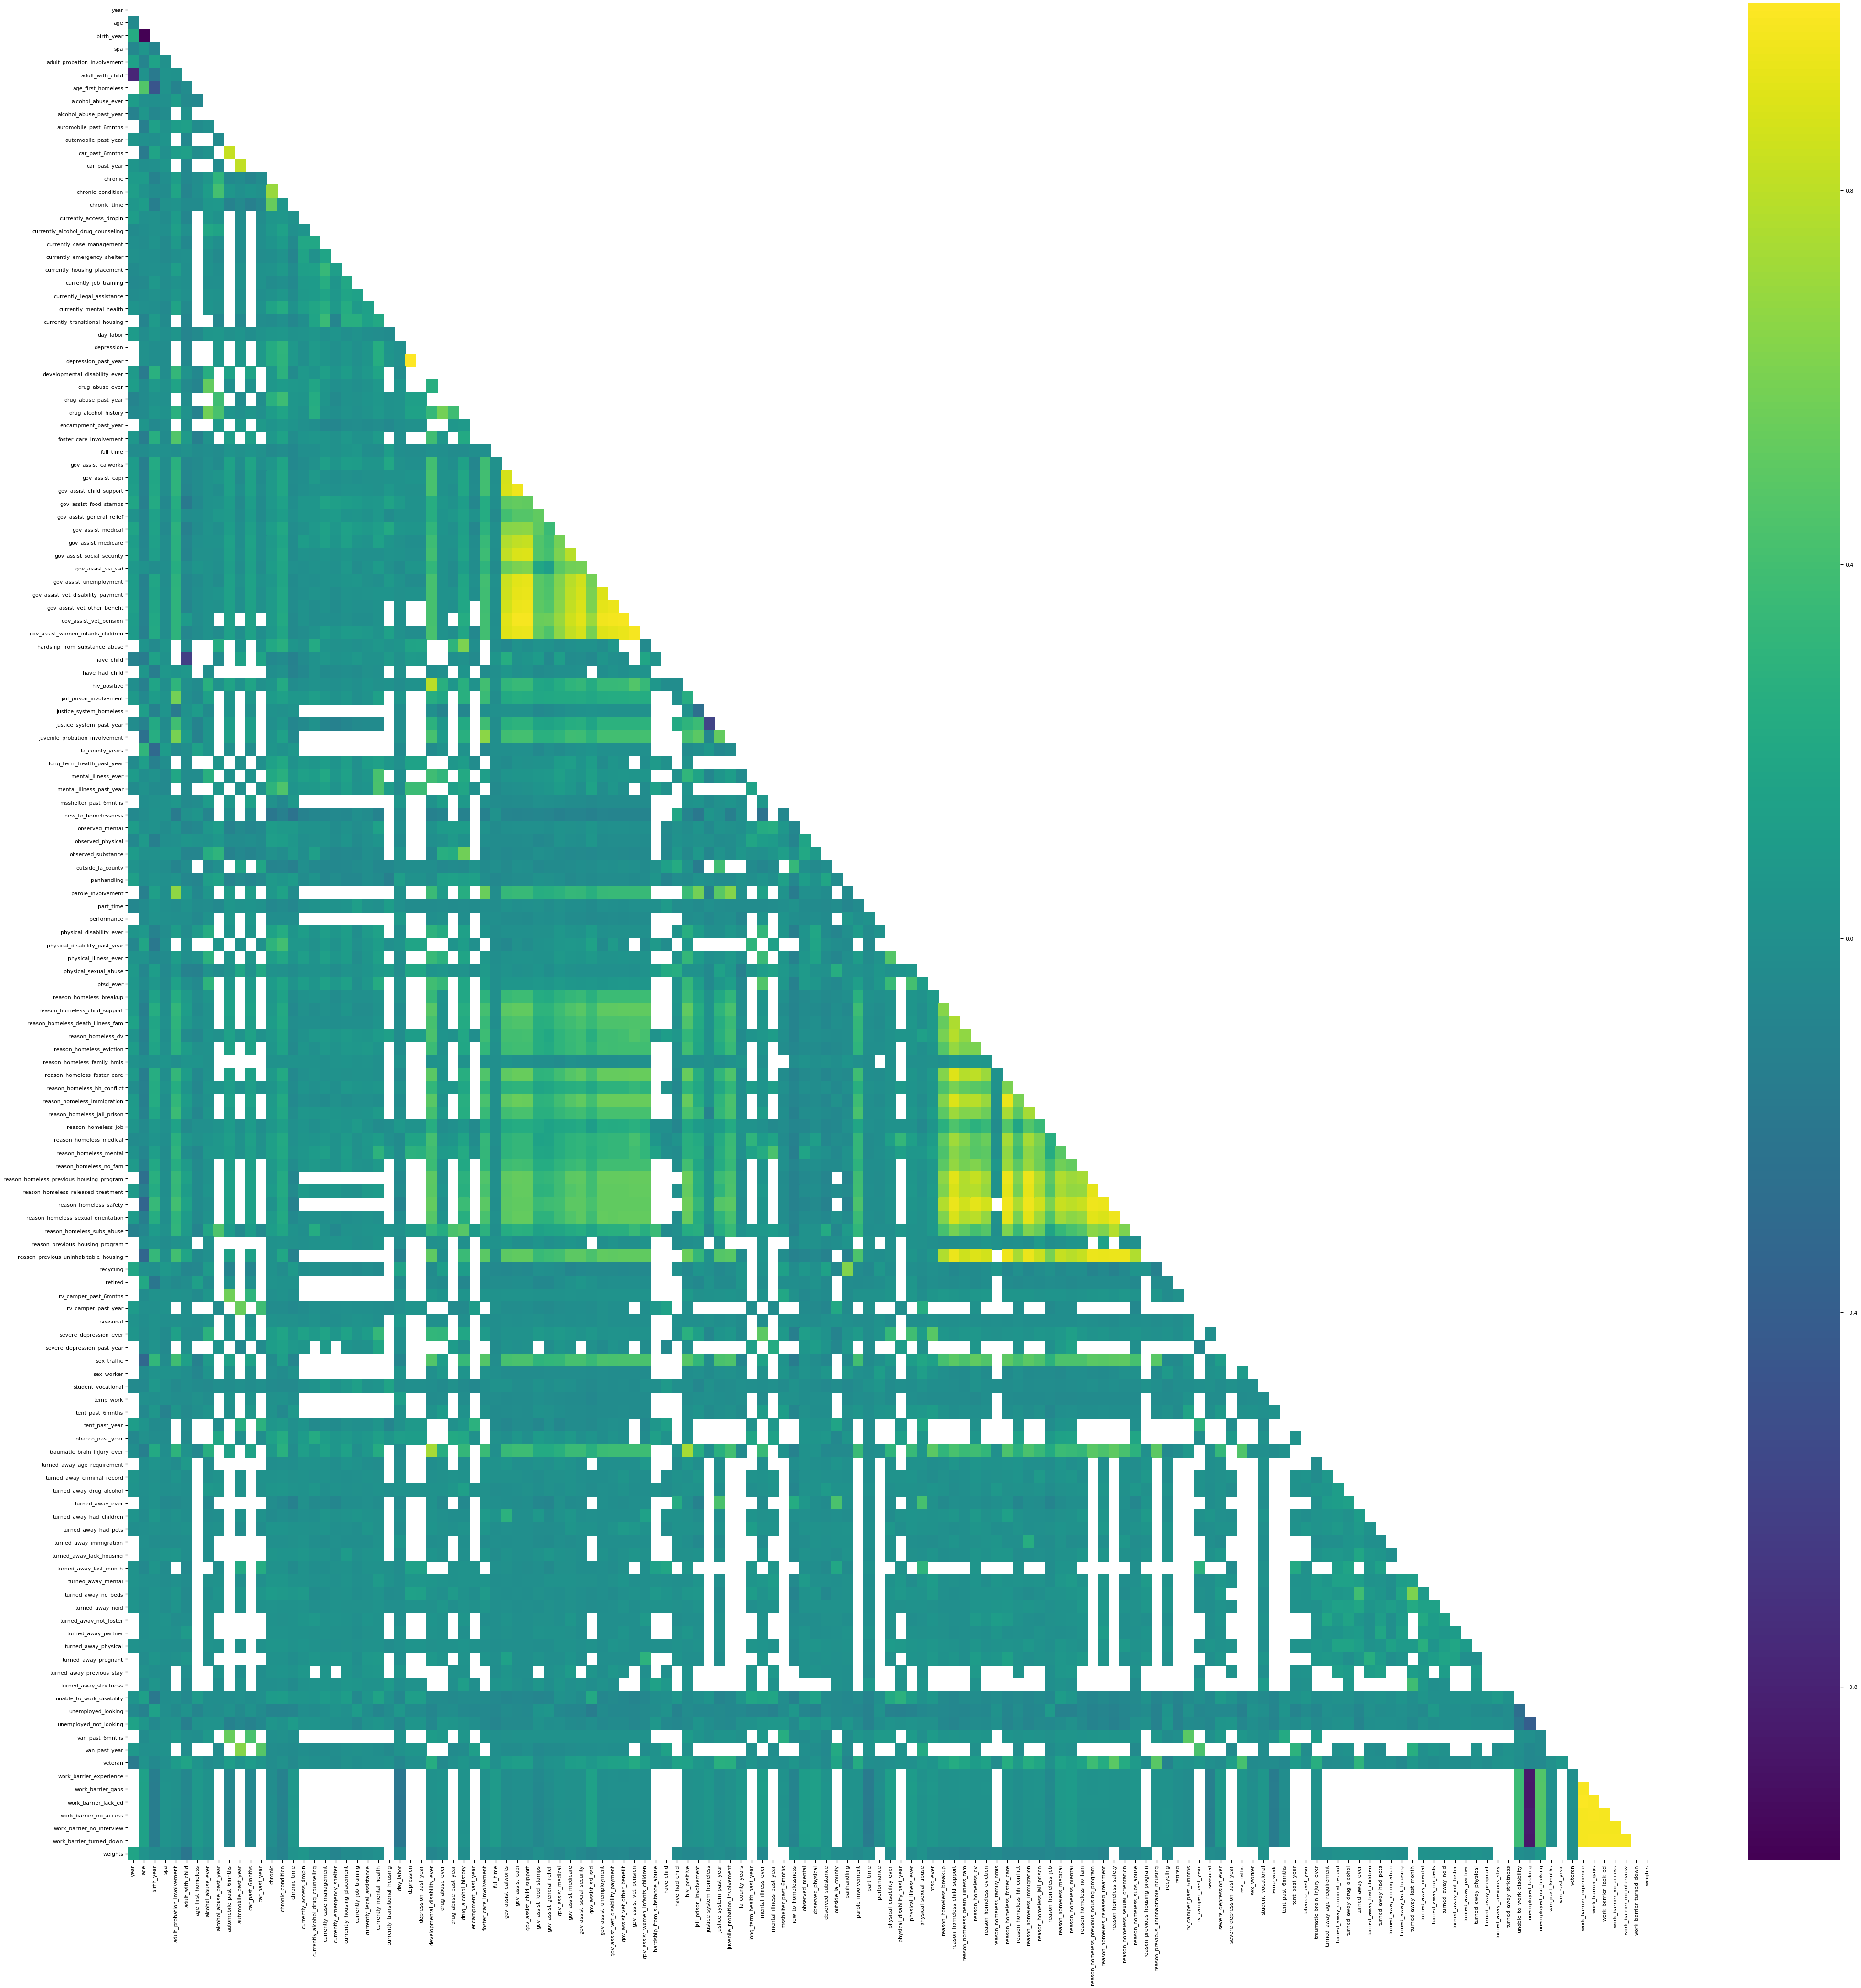

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21168 entries, 0 to 21167
Data columns (total 22 columns):
gender                               21030 non-null object
sex                                  21030 non-null object
raceeth                              21168 non-null object
race_full                            20991 non-null object
race_recode                          21168 non-null object
ethnicity                            21117 non-null object
census_tract                         17567 non-null object
census_tract_or_shelterid            3592 non-null object
current_stint_duration               21167 non-null object
current_stint_duration_detailed      21167 non-null object
er_past_year                         5681 non-null object
er_times_past_3mnths                 3268 non-null object
hospital_times_past_year             3268 non-null object
indoor_majority_last_month           10047 non-null object
la_community_before_current_stint    12093 non-null object
location_b

None

,count,unique,top,freq
gender,21030,4,Male,14864
sex,21030,3,M,14864
raceeth,21168,7,black,9035
race_full,20991,93,White,4830
race_recode,21168,4,African American,9359
ethnicity,21117,5,African American,9058
census_tract,17567,912,206300,1081
census_tract_or_shelterid,3592,245,206300,277
current_stint_duration,21167,13,12+ Months,11594
current_stint_duration_detailed,21167,551,12+ months,3814


# Nulls


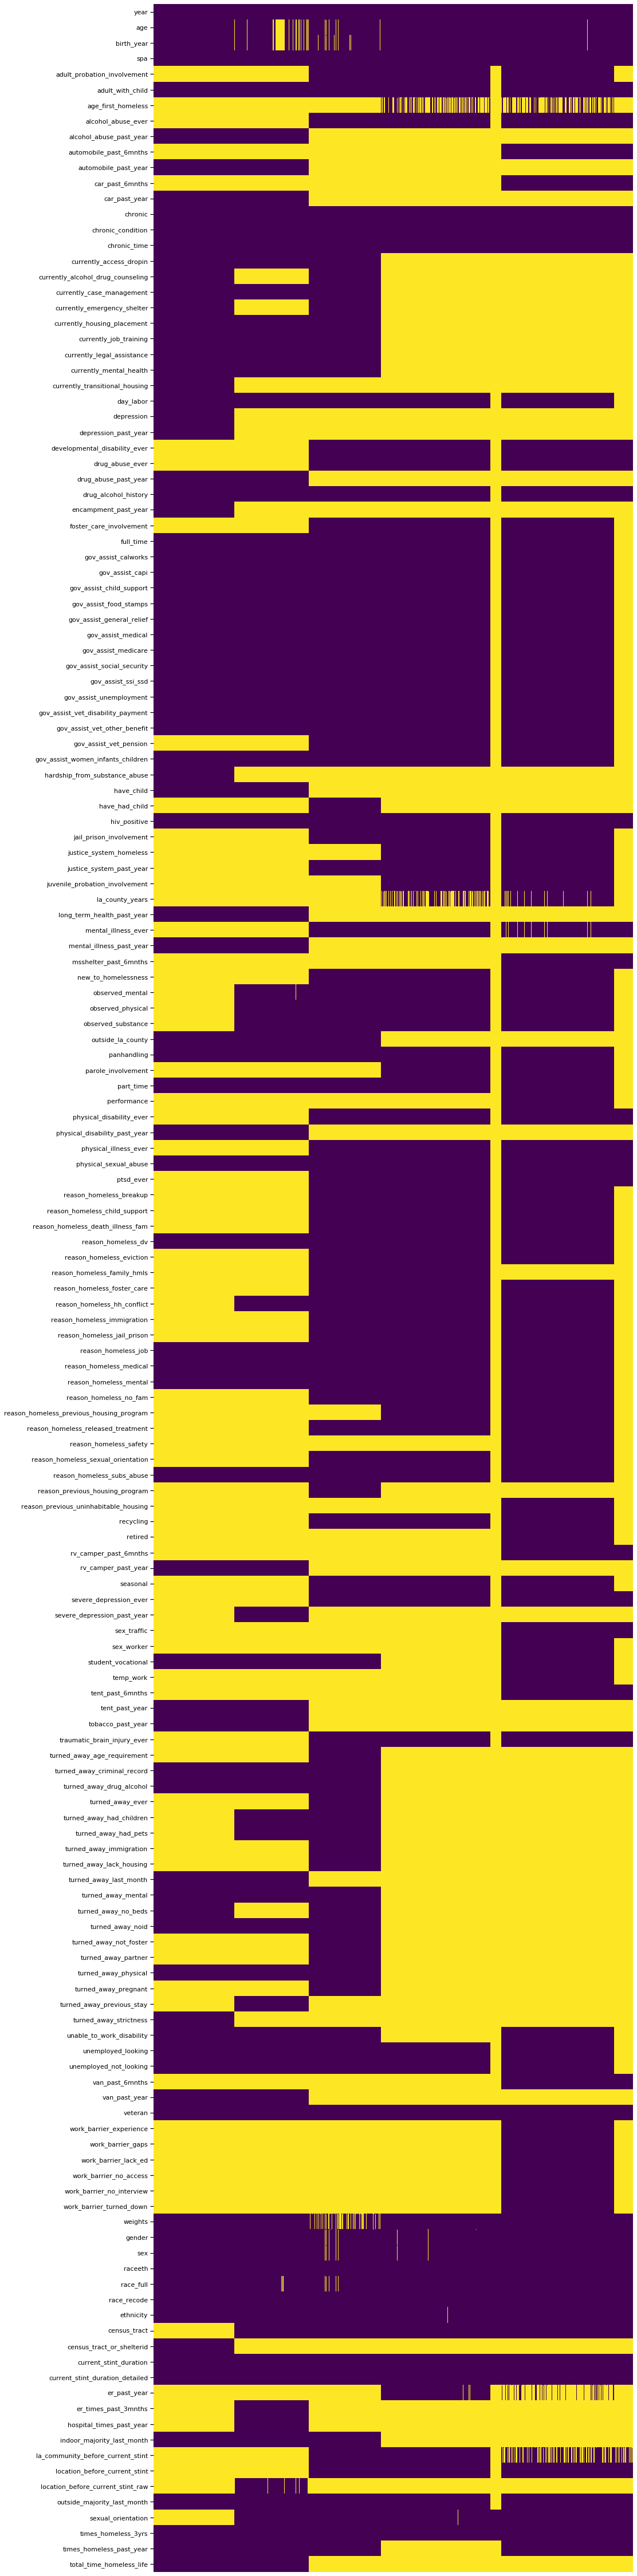

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )